## Statistical analysis with mingo.

This demo pretends to cover the use of the methods available for statistical analysis. Here we will provide an example of a multivariate analysis (MVA).

### Importing required methods and packages.

We need to import  `Database`, `DBInput` and `Standardised_matrix` . We will also need `matplotlib` and `numpy` modules for this demo.


- `Database` is a class used to create, fill and delete databases.
- `DBInput` is a datatype used to pass input to `Database`.
- `Standardised_matrix` is a class used to make statistical analysis. You can also use `Matrix` or `Normaliced_matrix` according to your needs.

In [1]:
from mingo import DBInput, Database, Standardised_matrix
import numpy as np
import matplotlib.pyplot as plt

### Call the database.

According to the `demo` program available, we already have a database called `demo` filled with all the sources. Here we will only call that database.

In [2]:
db_input = DBInput("demo", 
                  username = input("Enter user name: "))

db = Database(db_input)

### Create Matrix object.

In order to use the `Matrix` class (in this case `Standardised_matrix`), we need to initialize an object from the desired class.


In [3]:
stand_matrix = Standardised_matrix(db)

### Exploring the available methods.

Once we have an object from the class, we can call the methods available, according to our needs. 

We will start by presenting the methods `variables_list()` and `variables()`.

- `variables_list()` is a method that returns a list of the names of the variables.
- `variables()` is a method that returns a dictionary with the values of the variables stored in arrays. It takes as parameters *id*, *energy_value* and *R*.

In [4]:
#we will study for example the variables for an initial energy e_0 = 1000 MeV
id = 1 ; energy_value = 1000 ; R = 5

names = stand_matrix.variables_list()
variables = stand_matrix.variables(id, energy_value, R = 5)

#we print the names of the variables
print('varible\'s list: ',names, '\n')

#we show the first 10 elements of every variable
print('variables values:','\n')
for key, value in variables.items():
    print(f"{key}: {value[:10]}", 'length:', len(value))

varible's list:  ['hit_dist', 'shower_depth', 'shower_waist', 'plane_hits 2', 'plane_hits 3', 'plane_hits 4', 'scattering 2', 'scattering 3', 'scattering 4'] 

variables values: 

hit_dist: [42 32 70 53 25 58 44 15 25 46] length: 10000
shower_depth: [210. 220. 220. 245. 270. 310. 200. 245. 300. 185.] length: 10000
shower_waist: [265. 310. 525. 515. 400. 215. 310. 295. 530. 530.] length: 10000
plane_hits 2: [ 9 12 13 10  7  3 14 19  9 26] length: 9935
plane_hits 3: [ 8 12 26 18  3  4 22  5 12 13] length: 9919
plane_hits 4: [ 6  9 10 14 14 12  7 18 29  8] length: 9886
scattering 2: [ 84.2 150.6 112.6  49.    9.6  97.8  81.2  78.2  96.4 230.2] length: 9935
scattering 3: [ 20.   51.   58.6  31.6  20.8  45.   59.2  60.4  92.  110.6] length: 9919
scattering 4: [139.6  84.4 132.  195.6  58.8 176.4 214.2  69.  134.   48.6] length: 9886


We will call now the methods `get_matrix()` and `get_std_matrix()`.

- `get_matrix()` is a method that returns the variables in a (num_events x num_variables) matrix. It only includes the variables whose array's length is 10000. 
-  `get_std_matrix()` is a method that returns the covariance matrix.

In [5]:
_matrix_ = stand_matrix.get_matrix(id, energy_value, R = 5)

# we show the first 10 events
print('10 first elements of the matrix:','\n','\n',_matrix_[:10])

10 first elements of the matrix: 
 
 [[ 0.3188661  -0.33848653 -0.77968706]
 [-0.42616555 -0.10675754 -0.41275248]
 [ 2.40495472 -0.10675754  1.3403794 ]
 [ 1.13840091  0.47256492  1.25883839]
 [-0.94768771  1.97880333  0.32111668]
 [ 1.51091674  1.05188739 -1.18739215]
 [ 0.46787243 -0.57021552 -0.41275248]
 [-1.69271936  0.47256492 -0.535064  ]
 [-0.94768771  1.74707434  1.38114991]
 [ 0.61687876 -0.91780899  1.38114991]]


In [6]:
_std_matrix = stand_matrix.get_std_matrix(id, energy_value, R = 5)

print('Covariance matrix:','\n','\n',_std_matrix[:10])

Covariance matrix: 
 
 [[ 1.         -0.01103981 -0.00147791]
 [-0.01103981  1.         -0.06635631]
 [-0.00147791 -0.06635631  1.        ]]


We'll use now the methods `get_eigenvalues()` and `get_eigenvectors()`.

- `get_eigenvalues()` is a method that returns the eigenvalues of the covariance matrix, if none is given.
- `get_eigenvectors()` is a method that returns the eigenvectors of the covariance matrix, if none is given.

In [7]:
eigenvalues = stand_matrix.get_eigenvalues(id = id, energy = energy_value, R = 5)
eigenvectors = stand_matrix.get_eigenvectors(id = id, energy = energy_value, R = 5)

print('eigenvalues:',eigenvalues, '\n')
print('eigenvectors:','\n','\n',eigenvectors)

eigenvalues: [1.07901468 0.99543797 0.92554736] 

eigenvectors: 
 
 [[ 0.2340008  -0.972131   -0.01431602]
 [-0.68636214 -0.17560666  0.70574026]
 [ 0.68858597  0.15531781  0.70832601]]


Finally, we'll use the methods `print_eigenvalues()`, `print_eigenvectors()` and `print_variability()`.

- `print_eigenvalues()` is a method that plots a table with the eigenvalues.
- `print_eigenvectors()` is a method that plots a table with the eigenvectors.
- `print_variability()` is a method that plots the variability explained by each principal component.

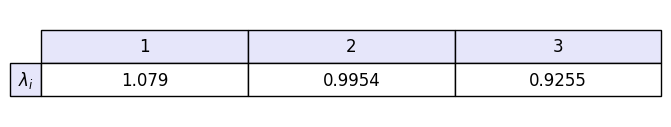

In [9]:
stand_matrix.print_eigenvalues(id, energy_value, R = 5)

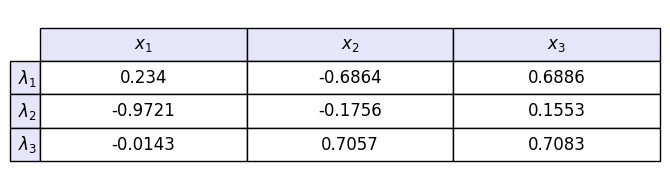

In [10]:
stand_matrix.print_eigenvectors(id, energy_value, R = 5)

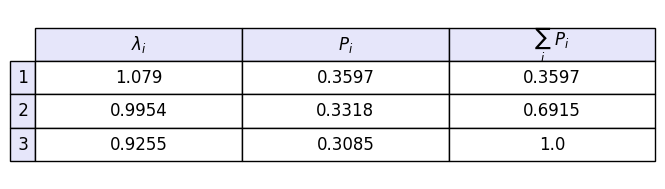

In [8]:
stand_matrix.print_variability(id, energy_value, R = 5)